In [175]:
import pandas as pd
df=pd.read_csv("C:\\Users\\lokes\\OneDrive\\Desktop\\one_hot_encoding.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


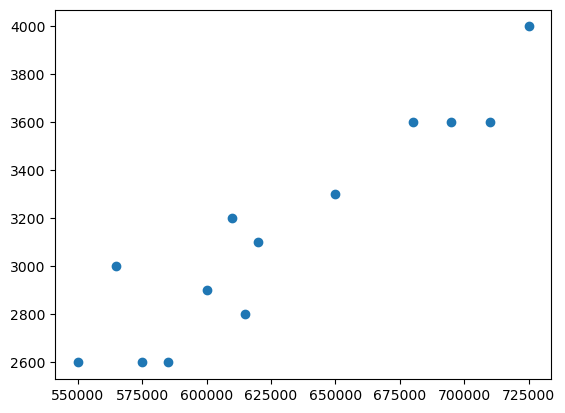

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.price,df.area)

In [177]:
dummy=pd.get_dummies(df.town)
dummy

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [178]:
merge=pd.concat([df,dummy],axis='columns')
merge

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [179]:
drops=merge.drop(["town","west windsor"],axis="columns")
drops

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [180]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [181]:
x=drops.drop(["price"],axis="columns")
x

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [182]:
y=drops.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [183]:
model.fit(x,y)

LinearRegression()

In [184]:
model.predict([[2800,0,1]])

C:\Users\lokes\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [185]:
model.predict([[3600,1,0]])

C:\Users\lokes\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([666607.18125134])

In [186]:
model.predict([[3400,1,0]])

C:\Users\lokes\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([641227.69296925])

In [187]:
model.score(x,y)

0.9573929037221873

In [188]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [189]:
dfle=df
dfle

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [190]:
dfle.town=le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [191]:
X=dfle[["town","area"]].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [192]:
Y=dfle.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [193]:
model.fit(X,Y)

LinearRegression()

In [194]:
model.predict([[0,2600]])

array([541819.90107652])

In [195]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
onehot_encoded = ohe.fit_transform(df[["town"]]) 
print(onehot_encoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


C:\Users\lokes\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [196]:
X=X[:,1:]
X

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000],
       [2600],
       [2800],
       [3300],
       [3600],
       [2600],
       [2900],
       [3100],
       [3600]], dtype=int64)

In [197]:
model.fit(X,onehot_encoded)

LinearRegression()

In [198]:
x_flat=X.flatten()
Y_flat=Y
df1=pd.DataFrame({"area":x_flat,"price":Y_flat})
df1

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000
5,2600,585000
6,2800,615000
7,3300,650000
8,3600,710000
9,2600,575000


In [199]:
import numpy as np
data1=np.transpose(onehot_encoded)
df2=pd.DataFrame(data1.T,columns=["X1","X2","X3"])
df2


,X1,X2,X3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [200]:
merge1=pd.concat([df1,df2],axis='columns')
merge1

,area,price,X1,X2,X3
0,2600,550000,1.0,0.0,0.0
1,3000,565000,1.0,0.0,0.0
2,3200,610000,1.0,0.0,0.0
3,3600,680000,1.0,0.0,0.0
4,4000,725000,1.0,0.0,0.0
5,2600,585000,0.0,0.0,1.0
6,2800,615000,0.0,0.0,1.0
7,3300,650000,0.0,0.0,1.0
8,3600,710000,0.0,0.0,1.0
9,2600,575000,0.0,1.0,0.0


In [201]:
df3=merge1.drop(["X3","price"],axis="columns")
df3

,area,X1,X2
0,2600,1.0,0.0
1,3000,1.0,0.0
2,3200,1.0,0.0
3,3600,1.0,0.0
4,4000,1.0,0.0
5,2600,0.0,0.0
6,2800,0.0,0.0
7,3300,0.0,0.0
8,3600,0.0,0.0
9,2600,0.0,1.0


In [202]:
Y4=merge1.price
Y4

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [203]:
X4=df3
X4

,area,X1,X2
0,2600,1.0,0.0
1,3000,1.0,0.0
2,3200,1.0,0.0
3,3600,1.0,0.0
4,4000,1.0,0.0
5,2600,0.0,0.0
6,2800,0.0,0.0
7,3300,0.0,0.0
8,3600,0.0,0.0
9,2600,0.0,1.0


In [204]:
model.fit(X4,Y4)

LinearRegression()

In [205]:
model.predict([[2600,1.0,0.0]])

C:\Users\lokes\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([539709.7398409])

In [206]:
model.score(X4,Y4)

0.9573929037221873